In [77]:
from sklearn.datasets import load_digits
from sklearn import ensemble,metrics, tree
from sklearn.model_selection import cross_validate,learning_curve, cross_val_score 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
%pylab inline


Populating the interactive namespace from numpy and matplotlib


<Figure size 432x288 with 0 Axes>

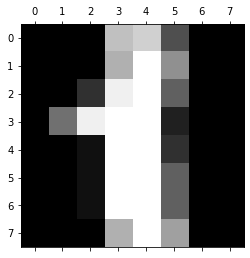

In [108]:
digits = load_digits()
plt.gray() 
plt.matshow(digits.images[1]) 
plt.show()


In [126]:
X = digits.data
y = digits.target

In [157]:
clf_1 = tree.DecisionTreeClassifier(random_state=0)
cvs_1 = cross_val_score(clf_1, X, y, cv=10)
cvs_1.mean()

0.8303337234738853

In [158]:
def write_array_to_file(answers, filename):
    with open(filename, "w") as fout:
        fout.write(" ".join([str(num) for num in answers]))
        
def write_one_to_file(answer, filename):
    with open(filename, "w") as fout:
        fout.write(str(answer))

In [159]:
write_one_to_file(cvs_1.mean(),'c2w4-1.txt')

In [160]:
clf_2 = BaggingClassifier(n_estimators=100, random_state=0).fit(X, y)
cvs_2 = cross_val_score(clf_2, X, y, cv=10)
cvs_2.mean()

0.9243136920825039

In [152]:
write_one_to_file(cvs_2.mean(),'c2w4-2.txt')

In [161]:
clf_3 = BaggingClassifier(n_estimators=100, max_features = round(X.shape[1]**0.5), random_state=0).fit(X, y)
cvs_3 = cross_val_score(clf_3, X, y, cv=10)
cvs_3.mean()

0.9365281294303756

In [162]:
write_one_to_file(cvs_3.mean(),'c2w4-3.txt')

In [191]:
tree_4 = tree.DecisionTreeClassifier(random_state=0,max_features = round(X.shape[1]**0.5))
clf_4 = BaggingClassifier(tree_4, n_estimators=100, random_state=0).fit(X, y)
cvs_4 = cross_val_score(clf_4, X, y, cv=10)
cvs_4.mean()


0.9544773623165452

In [192]:
write_one_to_file(cvs_4.mean(),'c2w4-4.txt')

In [195]:
for i in range(1,50,5):
    clf_5 = RandomForestClassifier(random_state = 0,oob_score=True, max_features = 'auto', max_depth = i,  n_estimators=100).fit(X, y)
    cvs_5 = cross_val_score(clf_5, X, y, cv=5)
    print(i, round(cvs_5.mean(),6), clf_5.oob_score_)
    print()

1 0.695409 0.6716750139120757

6 0.917162 0.9482470784641068

11 0.934963 0.9710628825820813

16 0.935499 0.9760712298274903

21 0.934943 0.9755147468002225

26 0.934943 0.9755147468002225

31 0.934943 0.9755147468002225

36 0.934943 0.9755147468002225

41 0.934943 0.9755147468002225

46 0.934943 0.9755147468002225



In [190]:
write_array_to_file([2,3,4,7], 'c2w4-5.txt')